# Medical Cost Prediction

The aim of this analysis is to predict the medical expense based on the patients'information. The dataset used for this analysis is Insurance dataset from Kaggle. The dataset contains 1338 observations and 7 variables. The variables are as follows:

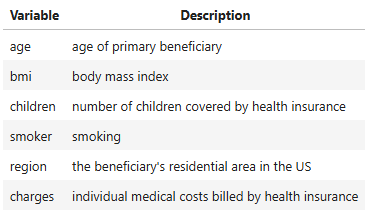

In [4]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(r"D:\Projects\insurance.csv" )

In [6]:
df.sample(10)


,age,sex,bmi,children,smoker,region,charges
1101,53,male,28.600,3,no,southwest,11253.42100
255,55,female,25.365,3,no,northeast,13047.33235
260,58,female,25.200,0,no,southwest,11837.16000
1307,32,male,28.120,4,yes,northwest,21472.47880
199,64,female,39.330,0,no,northeast,14901.51670
1311,33,female,26.695,0,no,northwest,4571.41305
712,43,female,30.685,2,no,northwest,8310.83915
112,37,male,30.800,0,no,southwest,4646.75900
291,29,male,29.640,1,no,northeast,20277.80751
1181,24,female,29.925,0,no,northwest,2850.68375


## Data Preprocessing

In [8]:
# number od rows and col
df.shape

(1338, 7)

In [9]:
# Checking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Cheching descriptive stat
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
#value counts for categorical variables
print(df.sex.value_counts(),'\n\n',df.smoker.value_counts(),'\n\n',df.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64 

 smoker
no     1064
yes     274
Name: count, dtype: int64 

 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [12]:
#changing categorical variables to numerical
df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [13]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
435,60,1,33.110,3,0,1,13919.82290
601,51,1,31.635,0,0,2,9174.13565
828,41,1,30.780,3,1,3,39597.40720
358,23,1,41.910,0,0,1,1837.28190
665,43,1,38.060,2,1,1,42560.43040
1107,50,0,26.220,2,0,2,10493.94580
598,43,1,32.600,2,0,0,7441.50100
163,32,0,29.800,2,0,0,5152.13400
418,64,1,39.160,1,0,1,14418.28040
1321,62,1,26.695,0,1,3,28101.33305


## Exploratory Data Analysis

Visualization of the data is a good way to understand the data. In this section, I will plot the distribution of each variable to get an overview about their counts and distributions.

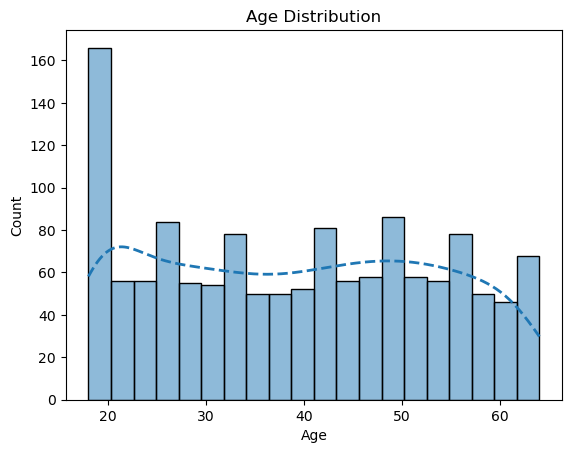

In [16]:
# age distribution 

sns.histplot(df.age,bins=20,kde=True,line_kws={'color': 'red', 'linewidth': 2, 'linestyle': '--'})
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

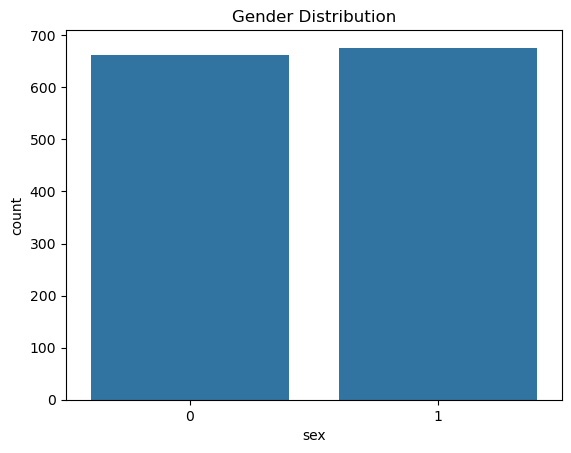

In [17]:
# Gender plot
sns.countplot(x='sex',data =df)
plt.title('Gender Distribution')

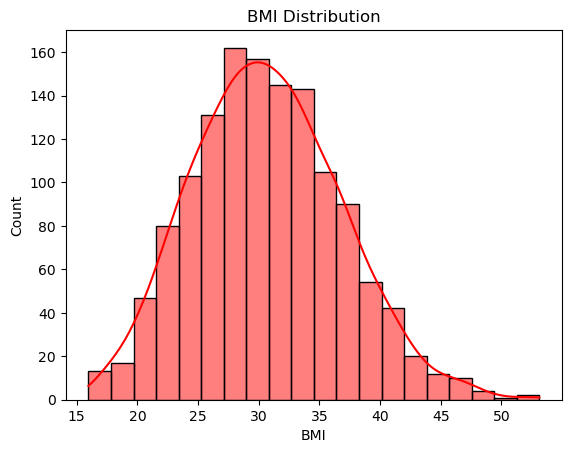

In [18]:
#bmi distribution
sns.histplot(df.bmi,bins=20, kde=True,color='red')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

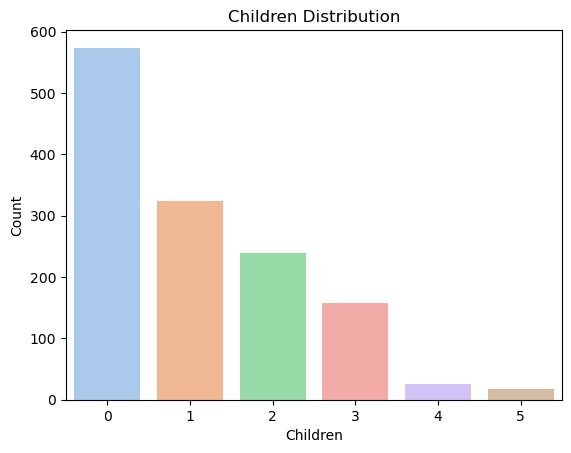

In [19]:

#child count distribution
sns.countplot(x = 'children', data = df,palette='pastel')
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

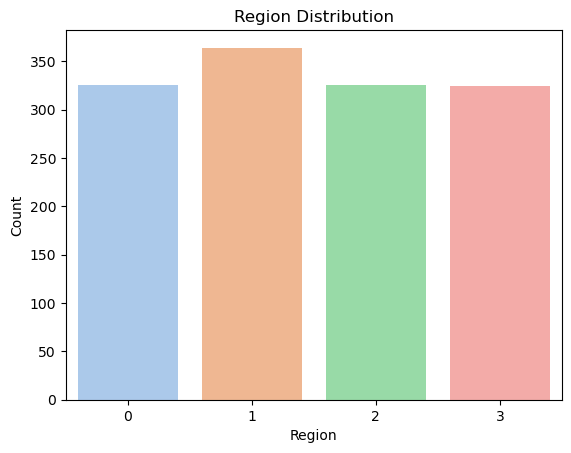

In [20]:
#regionwise plot
sns.countplot(x = 'region', data = df,palette='pastel')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

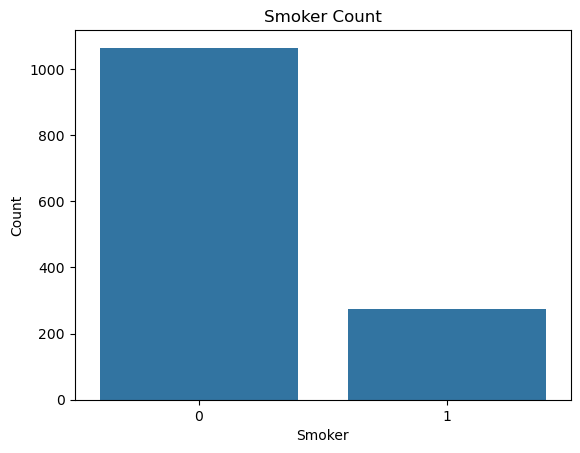

In [21]:
#count of smokers
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

smokers are very few in the dataset. Nearly 80% of the patients are non-smokers.

<Axes: xlabel='smoker', ylabel='count'>

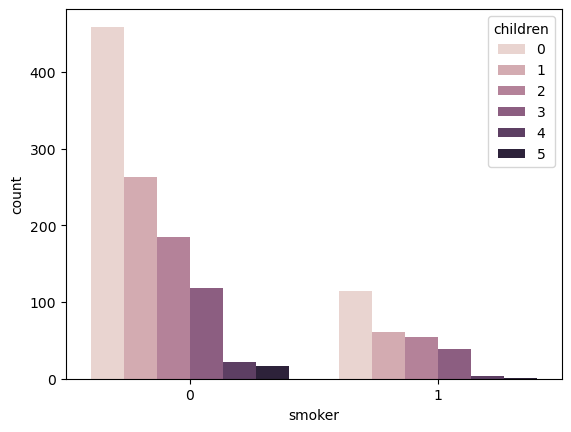

In [23]:

sns.countplot(x = df.smoker, hue = df.children)

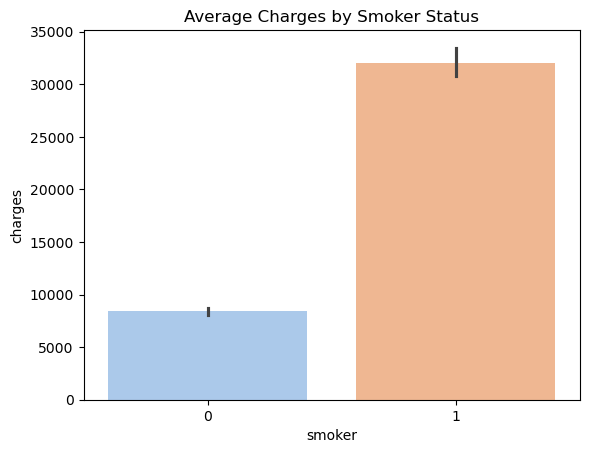

In [24]:
sns.barplot(x='smoker', y='charges', data=df, palette='pastel', estimator=np.mean)
plt.title('Average Charges by Smoker Status')
plt.show()

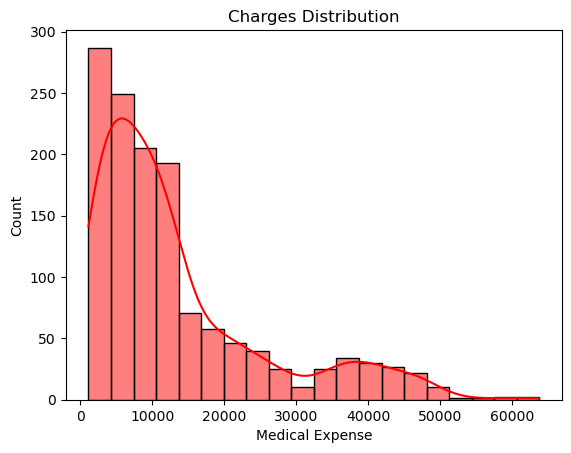

In [25]:
#charges distribution
sns.histplot(df.charges,bins=20, kde=True,color='red')
plt.title('Charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()


Most of the medical expenses are below 20000, with negligible number of patients having medical expenses above 50000.

From all the above plots, we have a clear understanding about the count of patients under each category of the variables. Now I will look into the coorelation between the variables.

## Coorelation

In [28]:
#coorelation matrix
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


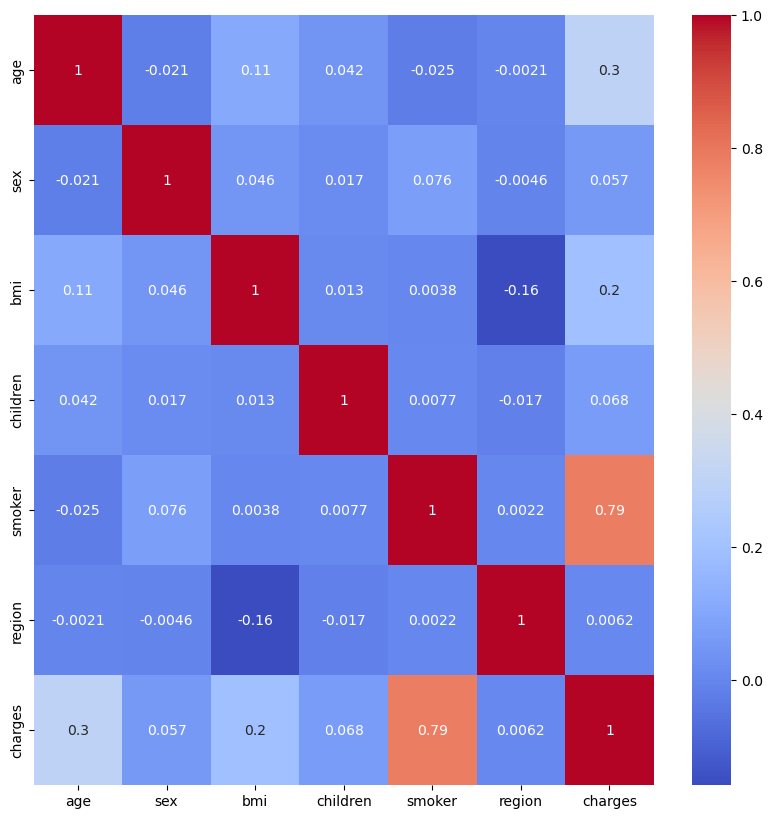

In [29]:
#plotting the coorelation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

The variable smoker shows a significant coorelation with the medical expenses. Now I will explore more into patients' smoking habits and their relationa with other factors.

### Plotting the smoker count with patient's gender

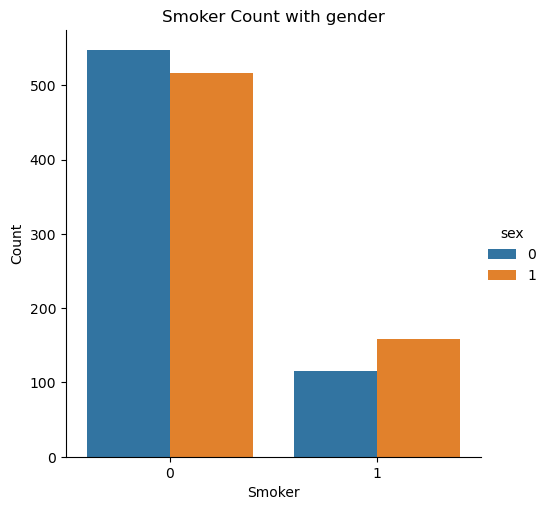

In [32]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

We can notice more male smokers than female smokers. So, I will assume that medical treatment expense for males would be more than females, given the impact of smoking on the medical expenses.

<Axes: xlabel='sex', ylabel='charges'>

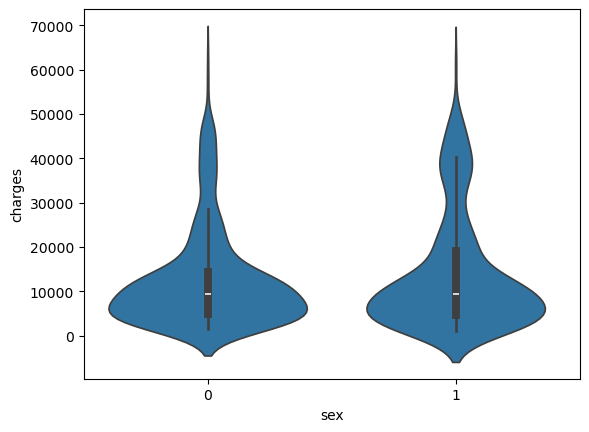

In [34]:
sns.violinplot(x = 'sex', y = 'charges', data = df)

## Train Test Split

In [36]:
x = df.drop('charges',axis=1)
y = df.charges

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

## Model Building

### 1. Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
lr

LinearRegression()

In [43]:
# model training
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
# Model accuracy
lr.score(x_train,y_train)

0.7417049283233981

In [45]:
#model prediction
lr_pred = lr.predict(x_test)

### 2. Decision Tree  Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree

DecisionTreeRegressor()

In [48]:
#model training
dtree.fit(x_train,y_train)
#model accuracy
dtree.score(x_train,y_train)

0.9983078124756305

In [49]:
#model prediction
dtree_pred = dtree.predict(x_test)

### 3. Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf

RandomForestRegressor()

In [52]:
#model training
rf.fit(x_train,y_train)
#model accuracy
rf.score(x_train,y_train)

0.9753862917352627

In [53]:

#model prediction
rf_pred = rf.predict(x_test)

## Model Evaluation

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### Linear Regression

MAE: 4186.508898366432
MSE: 33635210.4311784
RMSE: 5799.587091438355
R2 Score: 0.7833463107364539

------------------------


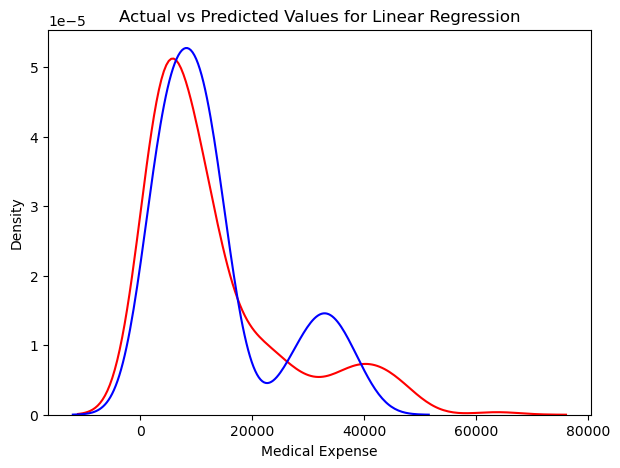

In [58]:
print('MAE:', mean_absolute_error(y_test, lr_pred))
print('MSE:', mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('R2 Score:', r2_score(y_test, lr_pred))
print()
print('------------------------')

#distribution of actual and predicted values
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(lr_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.show()

### Decision Tree Regressor

MAE: 2910.4011308171644
MSE: 39677128.76603553
RMSE: 6298.97839066269
Accuracy: 0.744428644377439

------------------------


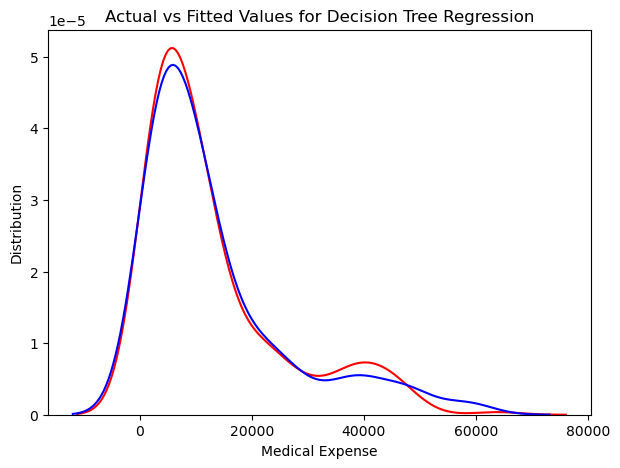

In [60]:
print('MAE:', mean_absolute_error(y_test, dtree_pred))
print('MSE:', mean_squared_error(y_test, dtree_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred)))
print('Accuracy:', dtree.score(x_test,y_test))
print()
print('------------------------')

#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Decision Tree Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

### Random Forest Regressor

MAE: 2514.8678517039057
MSE: 21223504.28319546
RMSE: 4606.897468274658
Accuracy: 0.863293541407647

------------------------


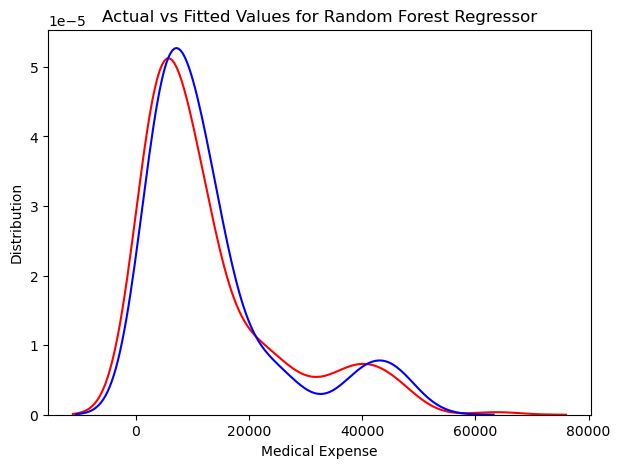

In [62]:
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('Accuracy:', rf.score(x_test,y_test))
print()
print('------------------------')

#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()